In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Dark mode for charts
colors = cycler('color', ['#669FEE', '#66EE91', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray'),
plt.rc('ytick', direction='out', color='gray'),
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')
plt.rc('figure', facecolor='#313233')

# Data Analysis

In [3]:
df = pd.read_csv('house_pricing.csv').drop(['ADDRESS', 'SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN', 'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'], axis=1)
df.head()

,PRICE,LAND_AREA,FLOOR_AREA
0,565000,600,160
1,365000,351,139
2,287000,719,86
3,255000,651,59
4,325000,466,131


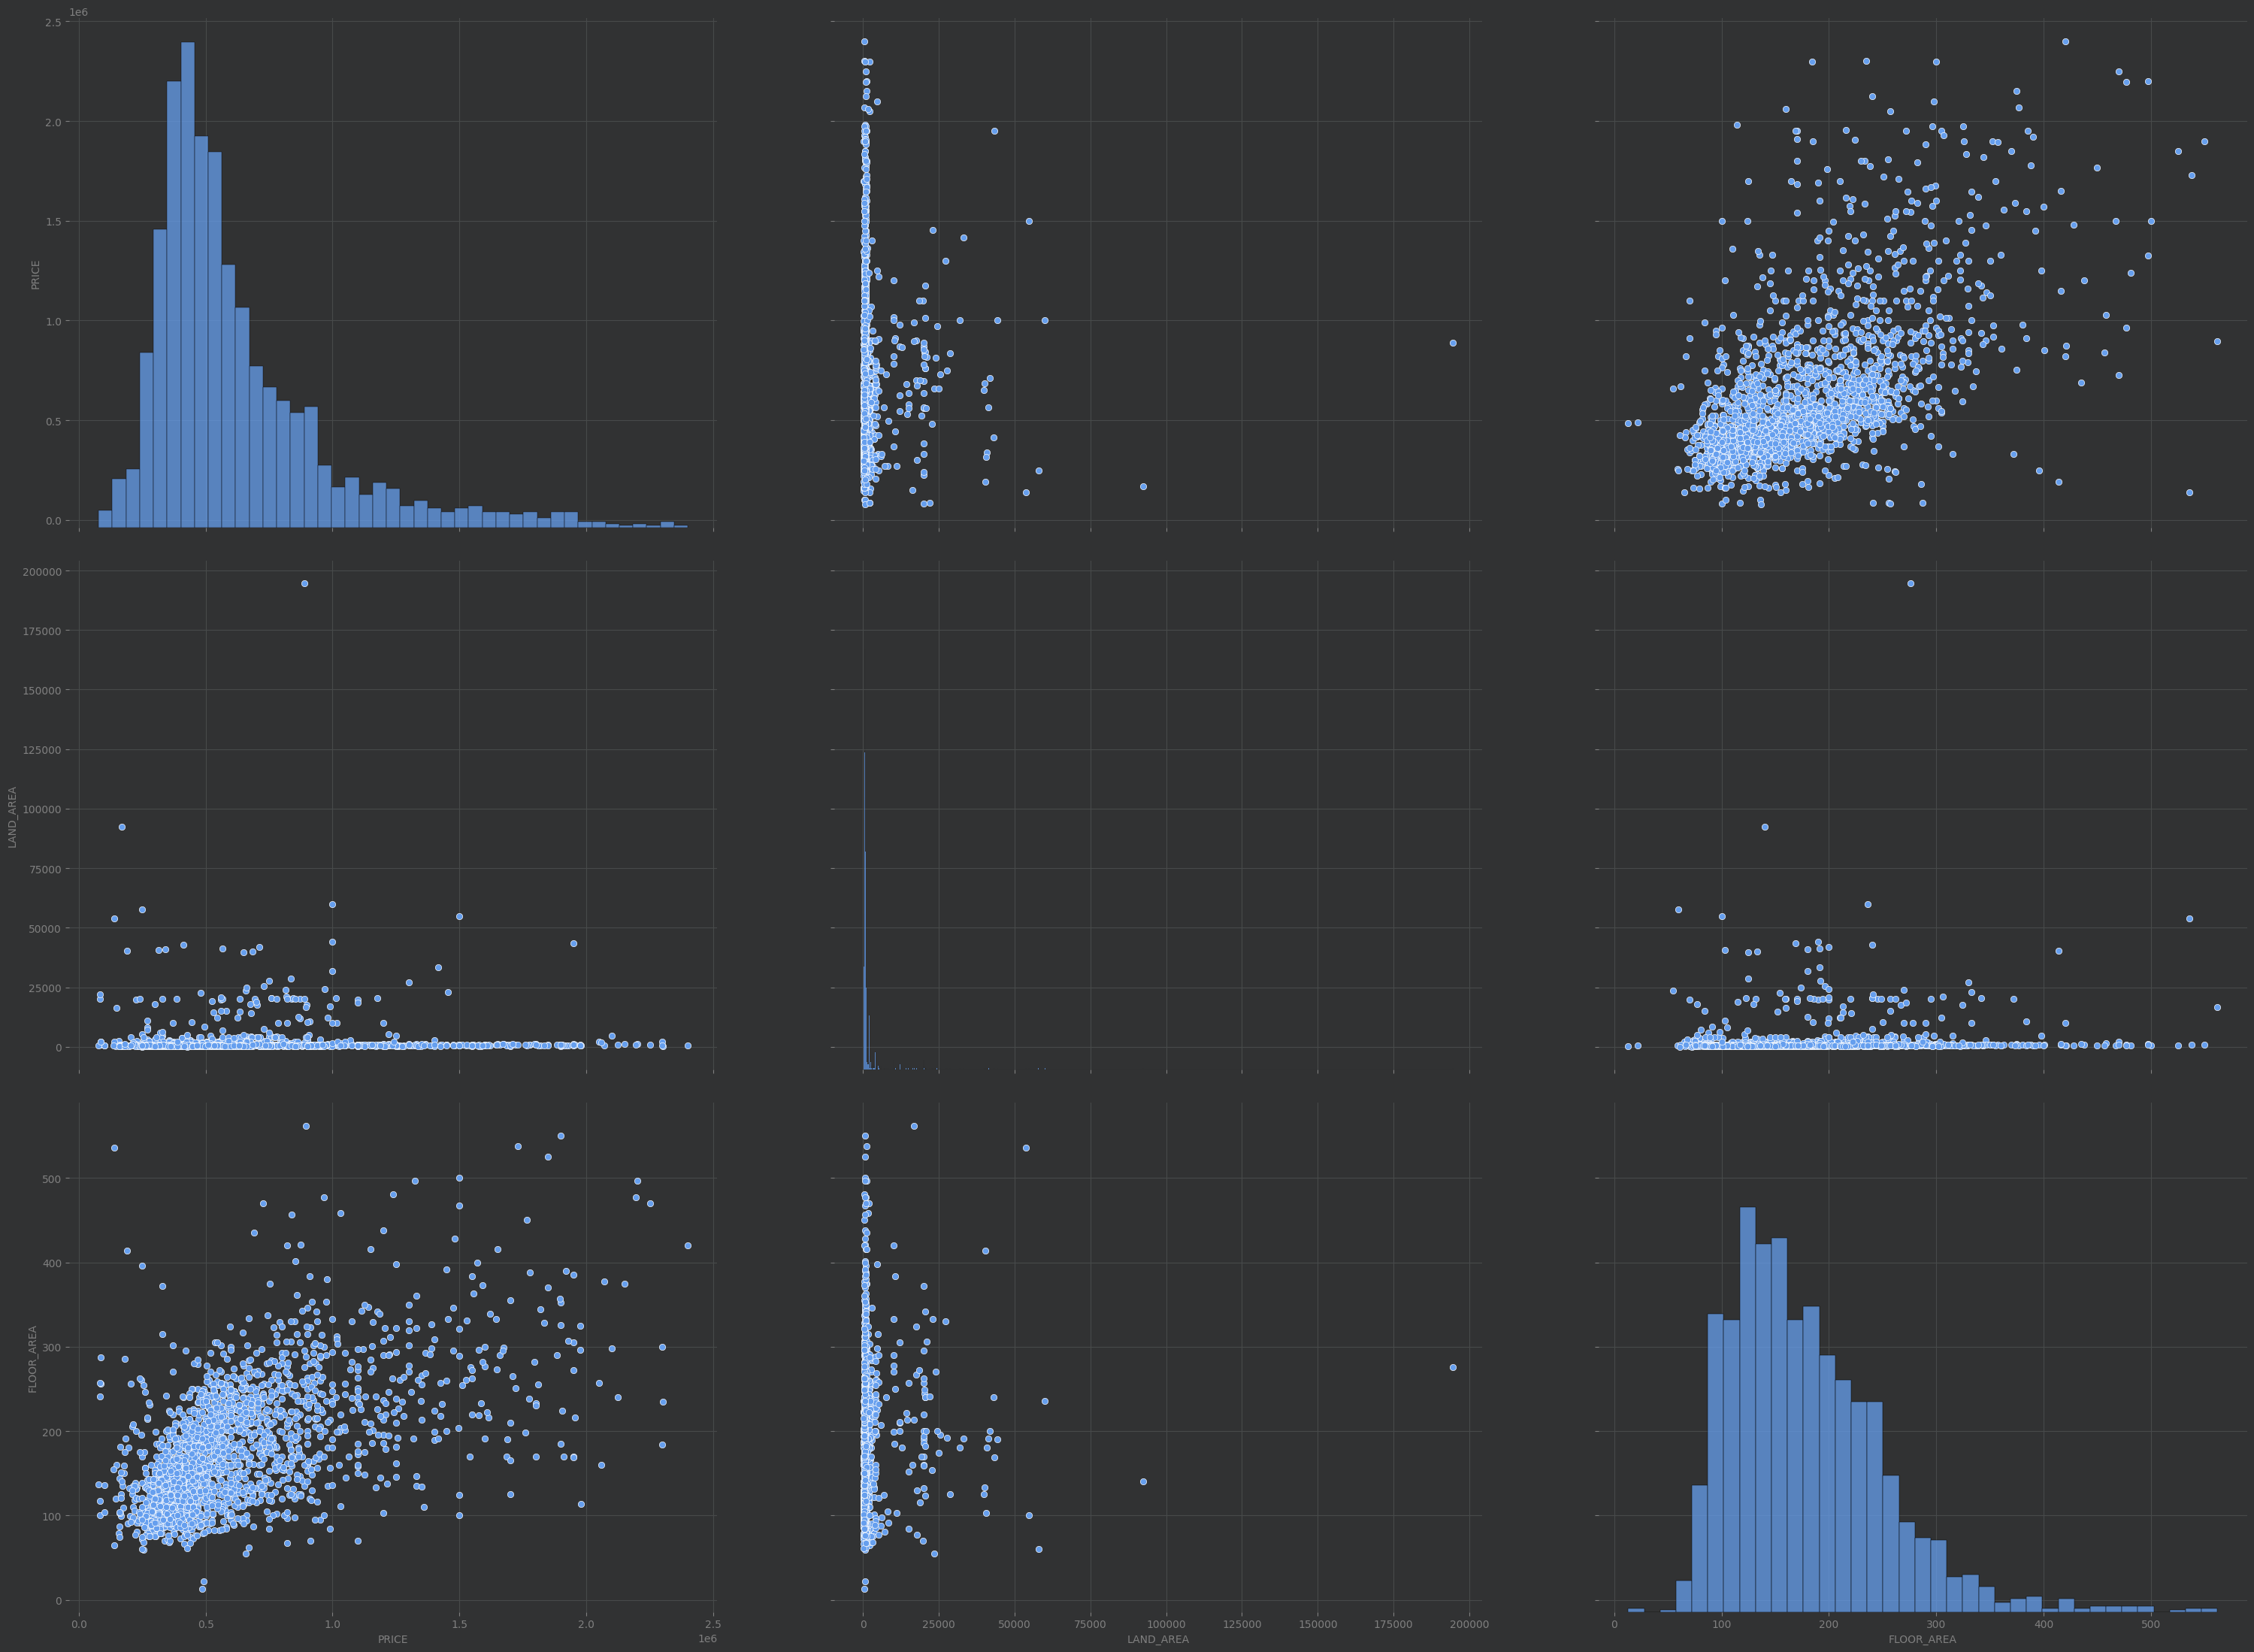

In [4]:
pair_plot = sns.pairplot(data=df)
fig = pair_plot.fig
fig.set_size_inches(34, 24)
plt.show()

In [5]:
# select features to use, labels , it accepts numpy arrays
X = df[['LAND_AREA', 'FLOOR_AREA']].values
y = df['PRICE'].values

In [6]:
# split into train and test data, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1427, 2), (612, 2), (1427,), (612,))

In [7]:
# standardize data only on train data to prevent data leakege on test data
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [8]:
# perform the standardization process X_train
scaled_train_data = scaler.transform(X_train)
scaled_train_data

array([[0.00183084, 0.21111111],
       [0.00123428, 0.44814815],
       [0.0037234 , 0.14444444],
       ...,
       [0.0039034 , 0.1537037 ],
       [0.00349711, 0.11481481],
       [0.00112628, 0.11296296]])

In [9]:
# perform the standardization process X_test to have them both standardized
scaled_test_data = scaler.transform(X_test)
scaled_test_data

array([[0.00124456, 0.32222222],
       [0.00227312, 0.37407407],
       [0.0035794 , 0.14259259],
       ...,
       [0.000612  , 0.15925926],
       [0.00234512, 0.31851852],
       [0.00192856, 0.23518519]])

# Neural Networks Model

In [13]:
# build the model, the final output will predict the price which is only 1
nn_model = Sequential()

nn_model.add(Dense(4, activation='relu'))
nn_model.add(Dense(4, activation='relu'))
nn_model.add(Dense(4, activation='relu'))
nn_model.add(Dense(1))

# take the right optimizer and loss based on the problem and using the right ones to solve it
nn_model.compile(optimizer='rmsprop', loss="mse")

# train the model, 1 epoch means going 1 time through the entire dataset
nn_model.fit(x=X_train, y=y_train, epochs=100)

Epoch 1/100
45/45 [==============================] - 1s 3ms/step - loss: 503611490304.0000
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 503136256000.0000
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 502613737472.0000
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 501873082368.0000
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 501029830656.0000
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 499903725568.0000
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 498632130560.0000
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 497046093824.0000
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 495285010432.0000
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 493002358784.0000
Epoch 11/100
45/45 [==============================] - 0s 2ms/step - loss: 490664919040.00

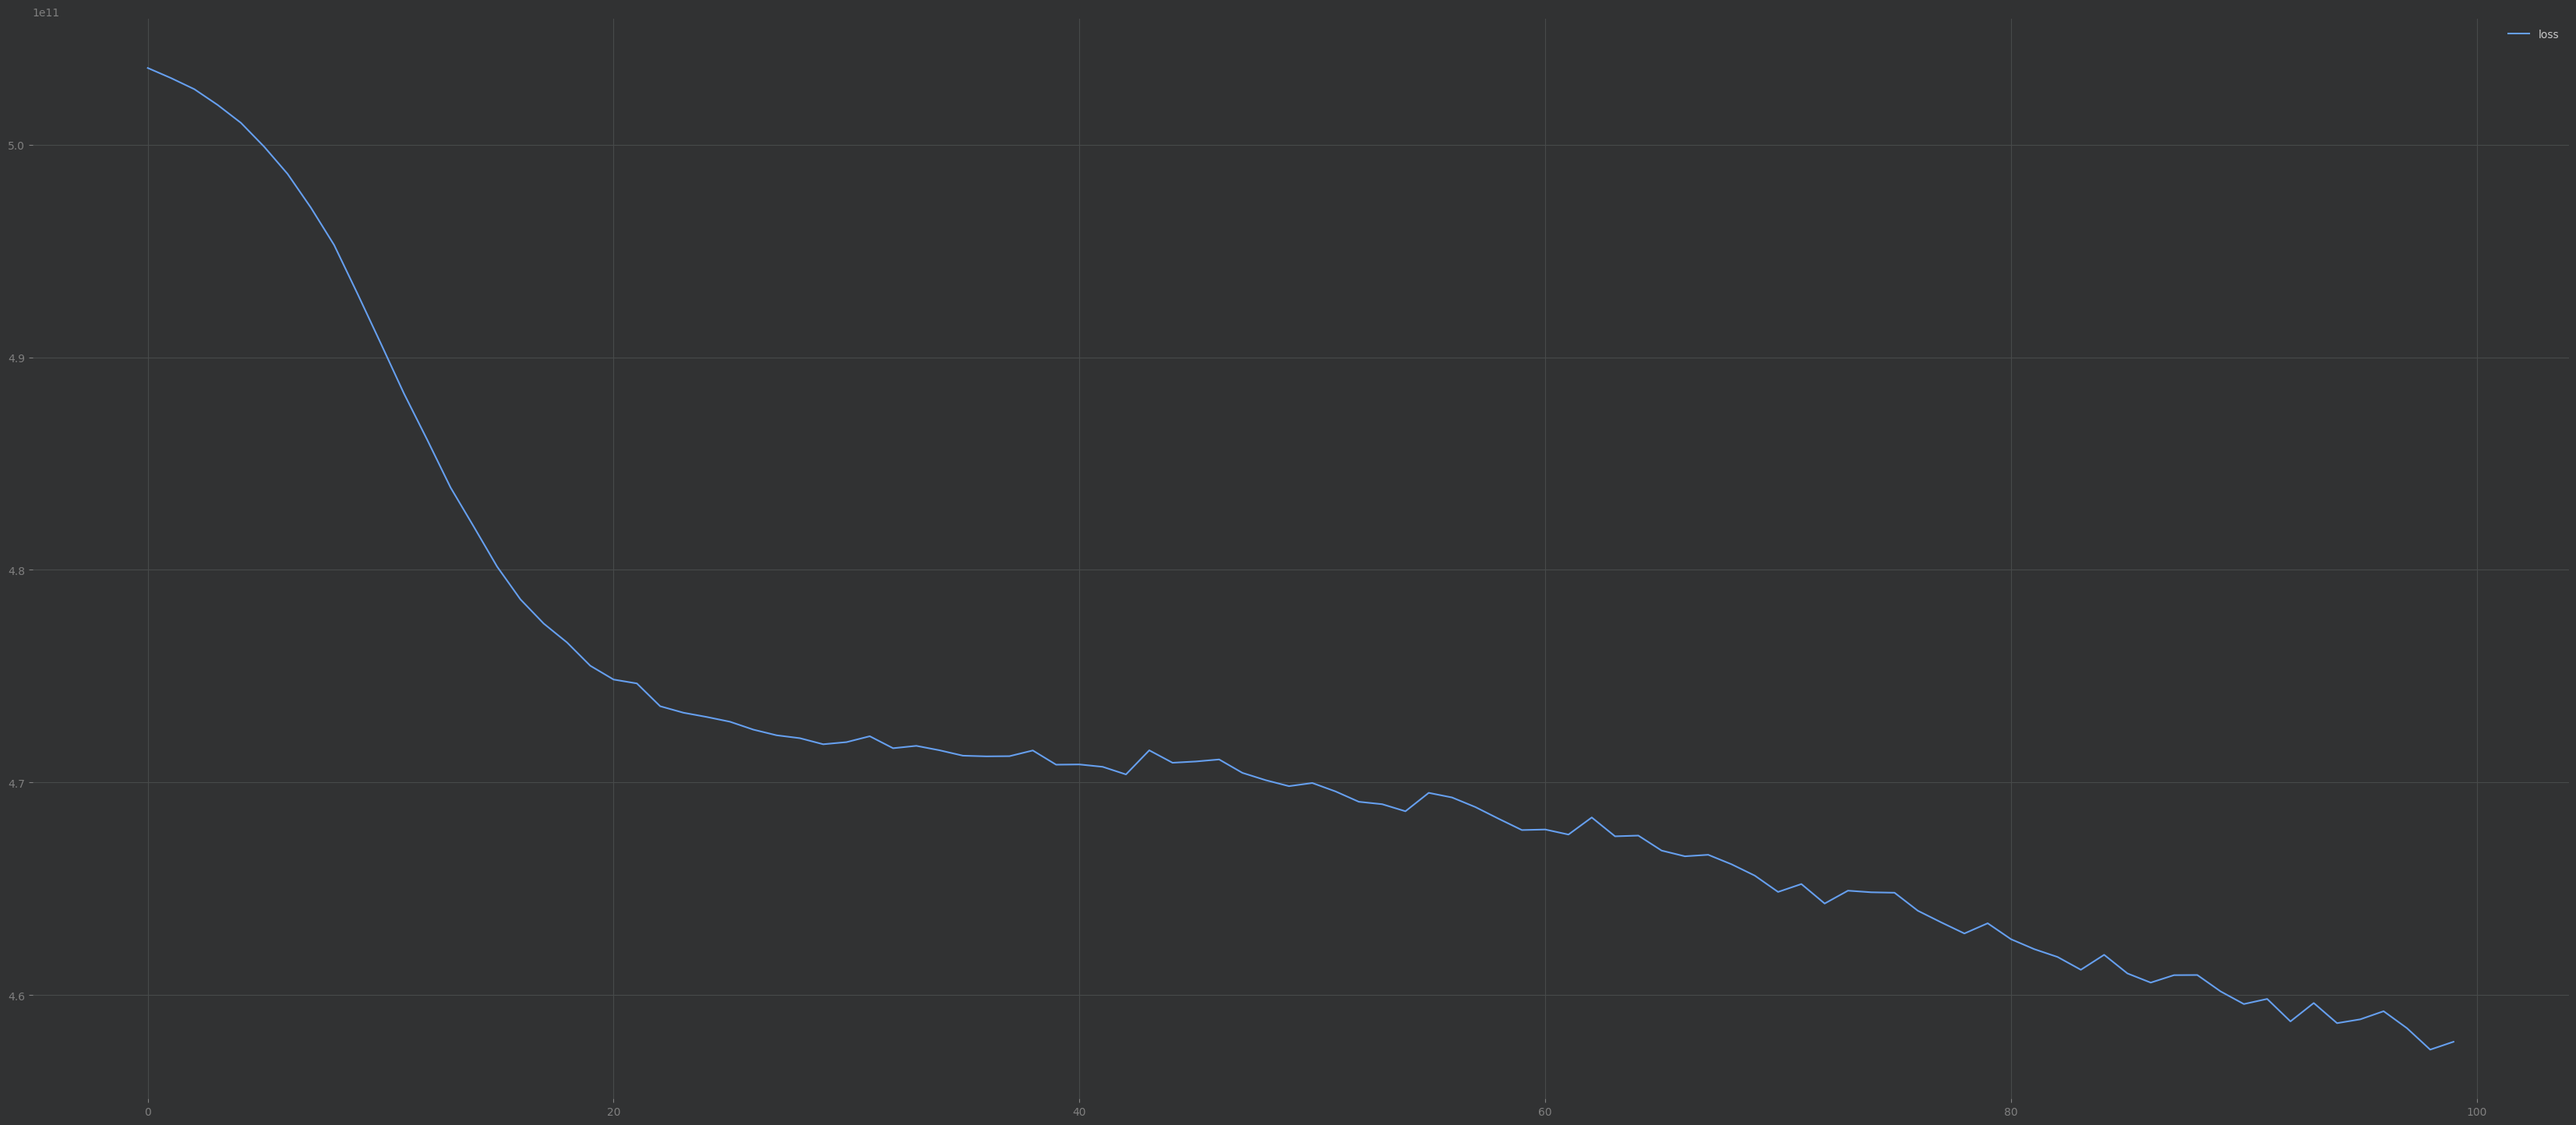

In [21]:
loss_df = pd.DataFrame(nn_model.history.history)

# plot the loss function
loss_plot = sns.lineplot(data=loss_df)
fig = loss_plot.figure
fig.set_size_inches(42, 18)
plt.show()

In [24]:
# evaluating the model on the testing data
nn_model.evaluate(X_test, y_test, verbose=0)

467150503936.0

In [25]:
# evaluating the model on the training data
nn_model.evaluate(X_train, y_train, verbose=0)

456805580800.0

In [26]:
# predict using the model
predictions = nn_model.predict(X_test)
predictions

20/20 [==============================] - 0s 2ms/step


array([[  40766.727],
       [  52165.26 ],
       [  43199.766],
       [  43408.277],
       [  64404.08 ],
       [  42599.875],
       [  39958.543],
       [  56766.883],
       [  25907.34 ],
       [  37756.156],
       [1040456.5  ],
       [  47283.508],
       [  42756.9  ],
       [ 231448.86 ],
       [  28317.492],
       [ 758083.6  ],
       [ 406350.1  ],
       [  41575.766],
       [  47763.777],
       [  38940.58 ],
       [  54330.137],
       [  59332.36 ],
       [  49395.516],
       [  57891.754],
       [  50425.562],
       [  45234.86 ],
       [  56039.855],
       [  27592.795],
       [  44400.71 ],
       [  42596.7  ],
       [  40172.035],
       [  48339.51 ],
       [  39575.953],
       [ 411213.3  ],
       [  52534.6  ],
       [  63819.664],
       [  52256.586],
       [  40260.71 ],
       [  63383.78 ],
       [ 839106.06 ],
       [  50794.69 ],
       [  92958.25 ],
       [  35148.836],
       [  43042.535],
       [  40498.465],
       [  

In [31]:
# transform predictions into a series data frame
predictions = pd.Series(predictions.reshape(612,))
predictions 

0      40766.726562
1      52165.261719
2      43199.765625
3      43408.277344
4      64404.078125
           ...     
607    73612.625000
608    38427.777344
609    23422.812500
610    48297.023438
611    38766.289062
Length: 612, dtype: float32

In [42]:
# combine testing data with predictions
predictions_df = pd.DataFrame(y_test)
predictions_df = pd.concat([predictions_df, predictions], axis=1)
predictions_df.columns = ['True Prices From Test', 'Model Predictions']

predictions_df.head()

,True Prices From Test,Model Predictions
0,1200000,40766.726562
1,435000,52165.261719
2,428000,43199.765625
3,546000,43408.277344
4,550000,64404.078125


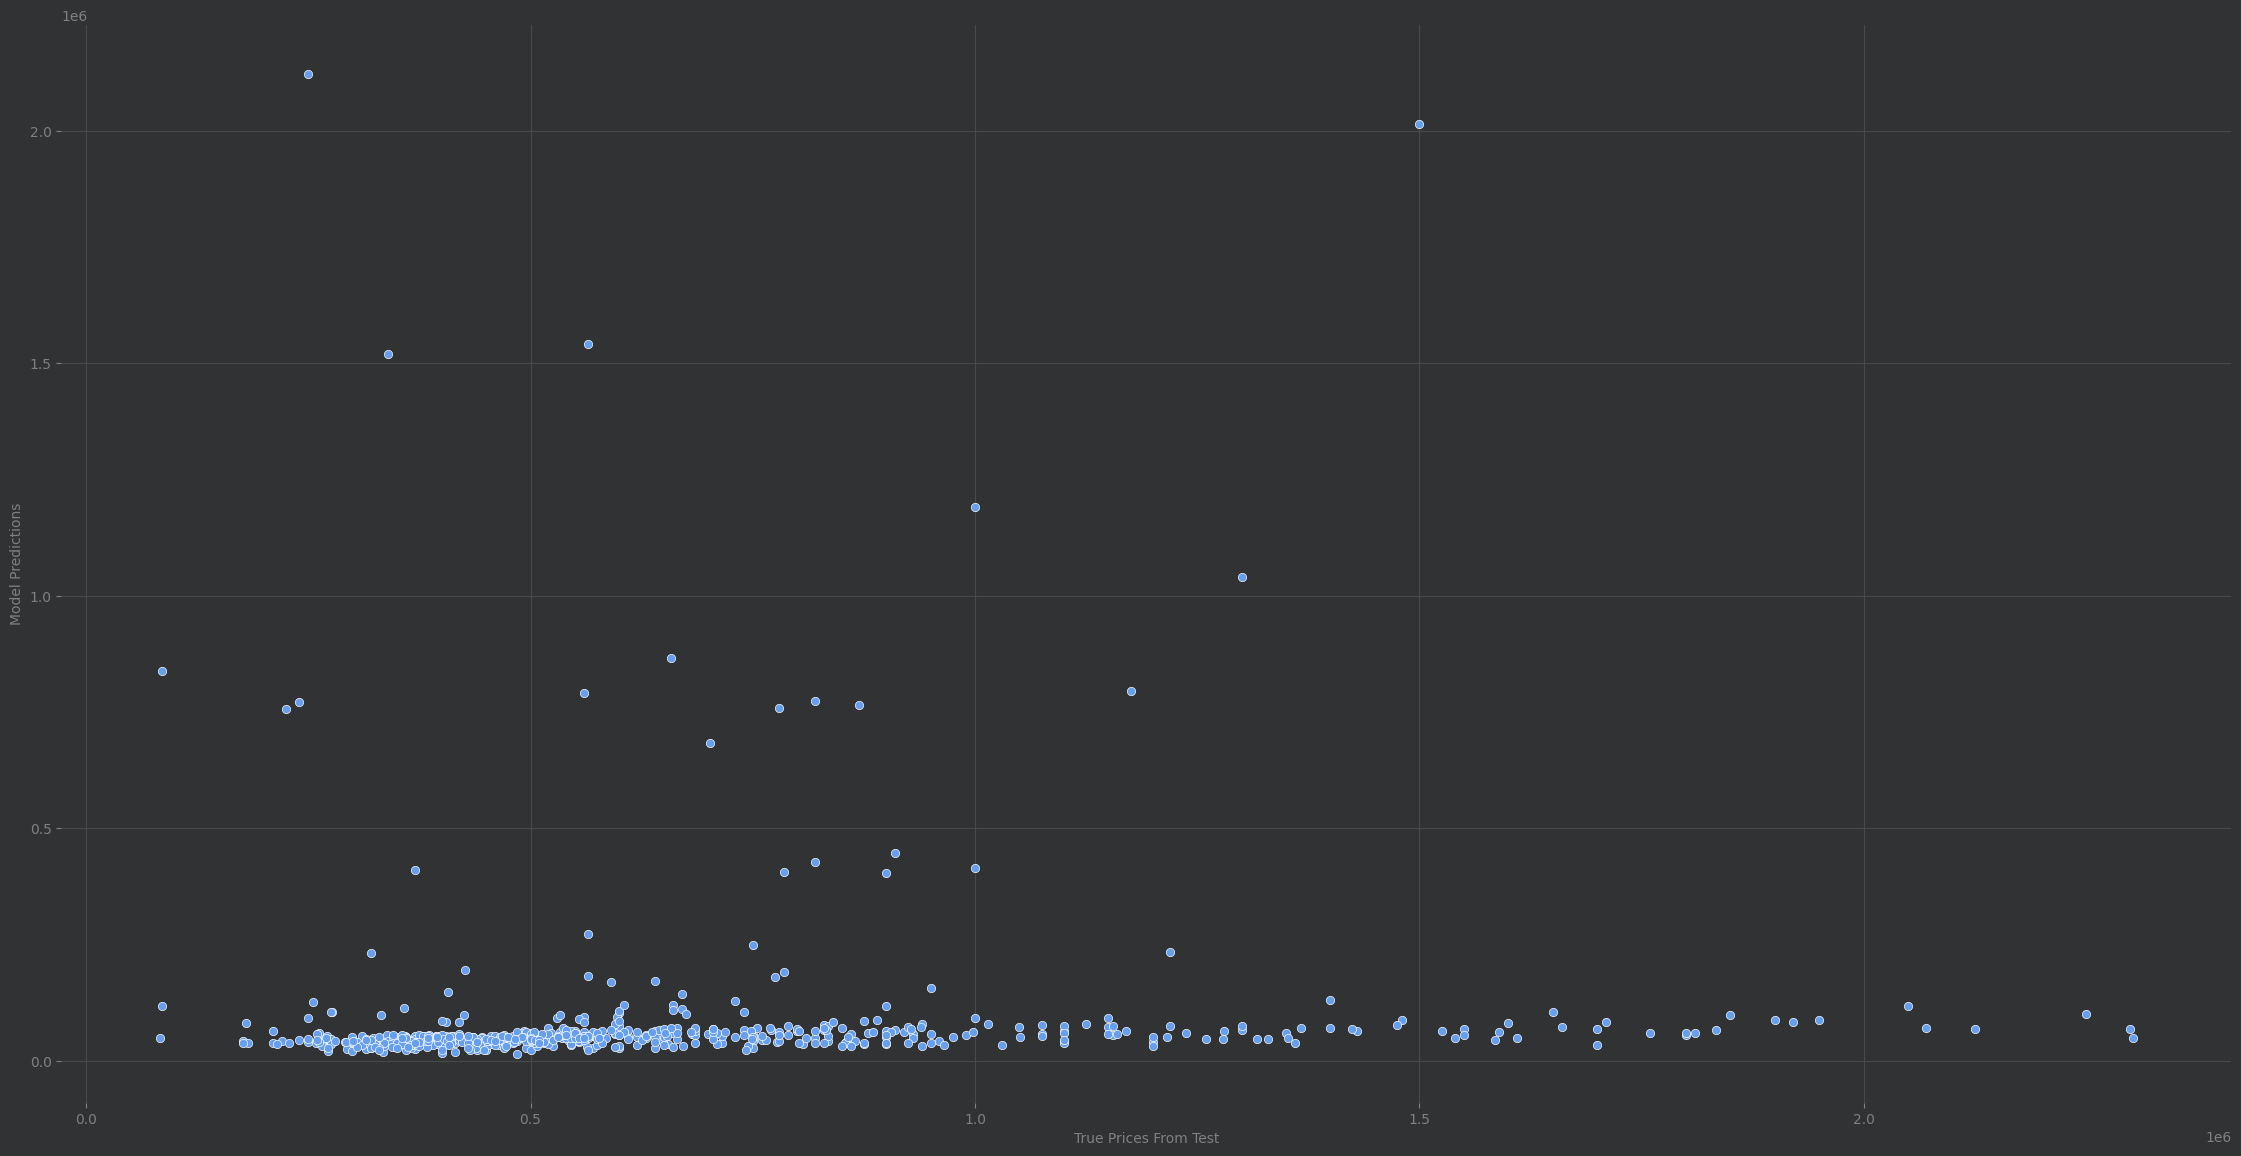

In [45]:
# plot the actual vs predicted values
scatter_plot = sns.scatterplot(data=predictions_df, x='True Prices From Test', y='Model Predictions')
fig = scatter_plot.figure
fig.set_size_inches(28, 14)
plt.show()